Data Reading & Storing only Weights Category


In [8]:
!pip install pandas
from IPython.display import display, HTML

# Enable word wrap for long outputs
display(HTML("<style>.output_area pre { white-space: pre-wrap; }</style>"))

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('Sample_Data_ML.csv')

In [11]:
category = df[df['entity_name'] == 'width']

In [12]:
category.to_csv('width_category_products.csv',index = False)
print(category.head())

                                             image_link  group_id entity_name  \
3205  https://m.media-amazon.com/images/I/51GzV0nG31...    675317       width   
3350  https://m.media-amazon.com/images/I/61Drr5Mq3n...    603688       width   
6272  https://m.media-amazon.com/images/I/519c3S677D...    916768       width   
7374  https://m.media-amazon.com/images/I/61Byi7hvtF...    704724       width   
7402  https://m.media-amazon.com/images/I/61+ZITVTtD...    311997       width   

          entity_value  
3205   22.0 millimetre  
3350   20.0 centimetre  
6272    9.0 centimetre  
7374  510.0 millimetre  
7402   75.0 centimetre  


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import pytesseract
import requests
from io import BytesIO
import re
import difflib
import cv2
import easyocr

Text Extraction without Rotation


In [14]:
image_url = 'https://m.media-amazon.com/images/I/610bLFQIS3L.jpg'

# Fetch the image from the URL
response = requests.get(image_url)

# Open the image from the response content
img = Image.open(BytesIO(response.content))

# Extract text from the image
text = pytesseract.image_to_string(img)

# Print the extracted text
print(text)

-r--

»»>

MAS 95cm/37.4"
MIN61cm/24"




Text Extraction with Rotation

In [15]:
def get_image_data(image_url):
    
    # Fetch the image from the URL
    response = requests.get(image_url)
    
    # Open the image from the response content
    img = Image.open(BytesIO(response.content))
    
    # List to store the extracted text at different rotations
    extracted_texts = []
    
    # Rotate the image in all four directions and extract text
    for angle in [0, 90, 180, 270]:
        # Rotate the image
        rotated_img = img.rotate(angle, expand=True)
        
        # Extract text from the rotated image
        text = pytesseract.image_to_string(rotated_img)
        
        # Store the extracted text in the list
        extracted_texts.append(text)
    
    return extracted_texts

In [16]:
get_image_data('https://m.media-amazon.com/images/I/71E7CU55dcL.jpg')

['Material:\nColors:\nWeight:\nVolume:\n\nShape:\n\nSpecifications:\n\n* borosilicate glass\n\n¢ 3- Natural, Pink, Gold\n* 160g\n* 180 ml\n\n¢ Shiba Inu\n\n9,5cm\n\n',
 'sodeys\nsou IOA\nISTO\nPICD ‘Yurg ‘TernzeN - € « tsa0]OD\nSS¥]Z aRVdT]IsoJog « «_:,VL.IaR EW\n\n{SUT} BDIZIOIdS\n\n',
 'wd G‘6\n\nnu] eqrus - sodeys\n[urost- saumMyoAa\n309% - SIUBION\nPICD ‘Yurg ‘TernzeN - € « tsa0]OD\nSSvI[Z aRVoTIsOtOg « «3 UIAIREP\n\nSSUOTJBDIZINIdS\n\n',
 'Specifications:\n\nMaterial:\n\n* borosilicate glass\nColors: ¢ 3- Natural, Pink, Gold\nWeight:\n\nVolume:\n\nShape:\n\n9,5cm\n\n']

Extracting Text in Rotation and cleaning ruubish and duplicate data

In [17]:
def clean_text(text):
    # Remove non-ASCII characters and keep only printable characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove excessive whitespace and unnecessary special characters
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def get_confident_text(image):
    # Use tesseract with 'image_to_data' to get confidence levels
    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    
    # Set a confidence threshold
    confidence_threshold = 50
    extracted_text = []
    
    for i, text in enumerate(data['text']):
        if int(data['conf'][i]) > confidence_threshold and text.strip():
            extracted_text.append(text)
    
    return ' '.join(extracted_text)

def is_similar(text1, text2, threshold=0.8):
    # Calculate the similarity ratio between two texts
    return difflib.SequenceMatcher(None, text1, text2).ratio() > threshold

def remove_similar_texts(text_list):
    unique_texts = []
    for text in text_list:
        if not any(is_similar(text, unique_text) for unique_text in unique_texts):
            unique_texts.append(text)
    return unique_texts

def get_image_data(image_url):
    # Fetch the image from the URL
    response = requests.get(image_url)
    
    # Open the image from the response content
    img = Image.open(BytesIO(response.content))
    
    # List to store the extracted text at different rotations
    extracted_texts = []
    
    # Rotate the image in all four directions and extract text
    for angle in [0, 90, 180, 270]:
        # Rotate the image
        rotated_img = img.rotate(angle, expand=True)
        
        # Extract text with confidence
        text = get_confident_text(rotated_img)
        
        # Clean the text
        cleaned_text = clean_text(text)
        
        # Store the cleaned text if not empty
        if cleaned_text:
            extracted_texts.append(cleaned_text)
    
    # Remove similar or repeated text
    unique_texts = remove_similar_texts(extracted_texts)
    
    return unique_texts

# Test the function with an image URL
image_url = 'https://m.media-amazon.com/images/I/71A7RiB2IIS.jpg'
extracted_text = get_image_data(image_url)
print(extracted_text)

[]


Getting an Image showing which Text is getting read

In [24]:
import requests
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import pytesseract

# Fetch the image from the URL
response = requests.get('https://m.media-amazon.com/images/I/613thsN41vL.jpg')
response.raise_for_status()  # Optional: ensure URL is valid

# Open the image with PIL and convert to RGB
img_pil = Image.open(BytesIO(response.content)).convert("RGB")

# Convert PIL image to OpenCV format (BGR)
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Resize the image to fit within a standard display (optional)
img = cv2.resize(img, (800, 600))

# Get image dimensions for adjusting y-coordinates (Tesseract origin is bottom-left)
height, width, _ = img.shape

# Get bounding boxes for each detected character
boxes = pytesseract.image_to_boxes(img)

# Draw rectangles around each character
for box in boxes.splitlines():
    box = box.split()
    if len(box) == 6:  # Make sure box data is complete
        char, x1, y1, x2, y2 = box[0], int(box[1]), int(box[2]), int(box[3]), int(box[4])
        # Note: y-axis in OpenCV is top-down, Tesseract is bottom-up
        img = cv2.rectangle(img, (x1, height - y2), (x2, height - y1), (0, 255, 0), 2)
        img = cv2.putText(img, char, (x1, height - y2 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Show the image with bounding boxes
cv2.imshow("Image with Character Boxes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


Extracting Text with Image showing which text is getting read


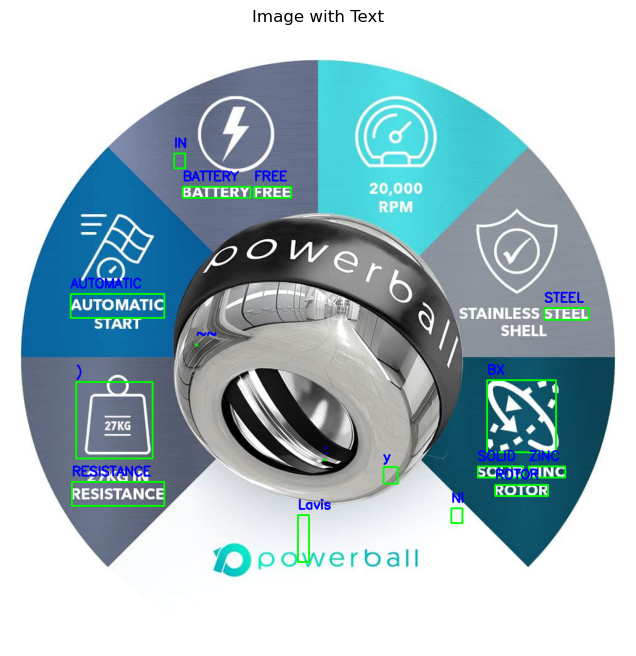

['BATTERY', 'FREE', 'AUTOMATIC', 'STEEL', 'BX', ':', 'y', 'SOLID', 'ZINC', 'RESISTANCE', 'ROTOR', 'NI', 'Lavis', ')', 'IN', '~~']


In [21]:
import matplotlib.pyplot as plt

def clean_text(text):
    # Remove non-ASCII characters and keep only printable characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove excessive whitespace and unnecessary special characters
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def get_confident_text(image):
    # Use tesseract with 'image_to_data' to get confidence levels
    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    
    # Set a confidence threshold
    confidence_threshold = 50
    extracted_text = []
    
    # Loop through the data to get bounding boxes and confident text
    for i, text in enumerate(data['text']):
        if int(data['conf'][i]) > confidence_threshold and text.strip():
            extracted_text.append({
                'text': text, 
                'x1': int(data['left'][i]), 
                'y1': int(data['top'][i]), 
                'x2': int(data['left'][i]) + int(data['width'][i]), 
                'y2': int(data['top'][i]) + int(data['height'][i])
            })
    
    return extracted_text

def is_similar(text1, text2, threshold=0.8):
    # Calculate the similarity ratio between two texts
    return difflib.SequenceMatcher(None, text1, text2).ratio() > threshold

def remove_similar_texts(text_list):
    unique_texts = []
    for text in text_list:
        if not any(is_similar(text['text'], unique_text['text']) for unique_text in unique_texts):
            unique_texts.append(text)
    return unique_texts

def get_image_data(image_url):
    # Fetch the image from the URL
    response = requests.get(image_url)
    
    # Open the image from the response content
    img_pil = Image.open(BytesIO(response.content))
    
    # Convert PIL image to OpenCV format (NumPy array)
    img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    
    # List to store the extracted text at different rotations
    extracted_texts = []
    
    # Rotate the image in all four directions and extract text
    for angle in [0, 90, 180, 270]:
        # Rotate the image
        rotated_img = img_pil.rotate(angle, expand=True)
        
        # Convert rotated PIL image to OpenCV format
        rotated_img_cv2 = cv2.cvtColor(np.array(rotated_img), cv2.COLOR_RGB2BGR)
        
        # Extract text with confidence
        texts_with_boxes = get_confident_text(rotated_img_cv2)
        
        # Clean the text and keep bounding box info
        cleaned_texts_with_boxes = [{'text': clean_text(t['text']), 'x1': t['x1'], 'y1': t['y1'], 'x2': t['x2'], 'y2': t['y2']} for t in texts_with_boxes if clean_text(t['text'])]
        
        # Store the cleaned text if not empty
        extracted_texts.extend(cleaned_texts_with_boxes)
    
    # Remove similar or repeated text
    unique_texts = remove_similar_texts(extracted_texts)
    
    # Draw bounding boxes around the text regions on the image
    for text_data in unique_texts:
        img = cv2.rectangle(img, (text_data['x1'], text_data['y1']), (text_data['x2'], text_data['y2']), (0, 255, 0), 2)
        img = cv2.putText(img, text_data['text'], (text_data['x1'], text_data['y1']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Show the image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image with Text")
    plt.show()

    
    # Return only the unique text without duplicates
    return [text_data['text'] for text_data in unique_texts]

# Test the function with an image URL
image_url = 'https://m.media-amazon.com/images/I/613thsN41vL.jpg'
extracted_text = get_image_data(image_url)
print(extracted_text)

Using CPU. Note: This module is much faster with a GPU.
C:\Users\danis\AppData\Roaming\Python\Python312\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

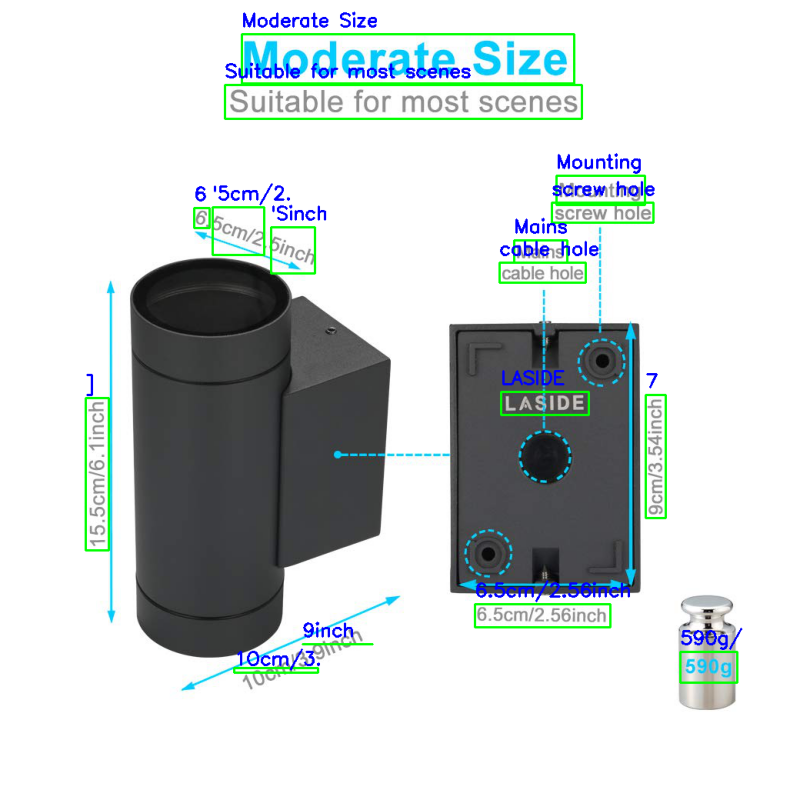

['Moderate Size', 'Suitable for most scenes', 'Mounting', '6', 'screw hole', 'Mains', 'cable hole', 'LASIDE', ']', '7', '6.5cm/2.56inch', '590g/', "'5cm/2.", "'Sinch", '9inch', '1Ocm/3.']


In [22]:
import requests
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import easyocr
import matplotlib.pyplot as plt

# Function to display image with detected text
def display_image_with_text(img, results):
    # Convert image to OpenCV format if needed
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Loop through detected text results and draw bounding boxes
    for (bbox, text, prob) in results:
        top_left = (int(bbox[0][0]), int(bbox[0][1]))
        bottom_right = (int(bbox[2][0]), int(bbox[2][1]))

        # Draw bounding box and text
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(img, text, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Use matplotlib to show the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Function to get image data and process text using EasyOCR
def get_image_data(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch image: {e}")
        return []

    # Load the image using PIL
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'], gpu=False)  # Change gpu=True if you have CUDA configured

    # Read text from image
    results = reader.readtext(np.array(img))

    # Display results
    display_image_with_text(img, results)

    # Return detected texts
    return [text for (_, text, _) in results]

# Test the function
image_url = 'https://m.media-amazon.com/images/I/516FI3eapZL.jpg'
extracted_text = get_image_data(image_url)
print(extracted_text)
